# **Sexism in "Survivor"**

Let's talk about my favorite television show, Survivor! It's been around for 20 years, it has 40 seasons, and yes, it is still going on (Season 41 is being filmed as I type this!). For those who do not know, Survivor is a reality television show and social strategy game where they put between 16-20 strangers (well, usually strangers) on an island (or desert, rainforest, etc.) and they have to live with each other in their own little society. The fun part about Survivor is they get to vote people off of their tribe and do not live with them anymore. They start off split into (2-4) tribes and have challenges, with the losing tribe going to "Tribal Council", the place where they vote someone off. Eventually, they merge into 1 tribe and keep voting people off until there are only 2 or 3 people left. The people who have been voted off make up the jury and they vote for someone in the final 2/3 to win the season. And that's a qick gist of Survivor!

Now even though it is my favorite show, it does come with its problems. One of the main ones is an inequality between men and women in Survivor. This exists in both the game of Survivor, in terms of how fair it is for men versus women, as well as in the show of Survivor, in how men versus women are portrayed on television. 

Also, there is a monumental distinction to make between the game of Survivor and the show of Survivor. The game of Survivor is what happens out there on the island and how the production behind the scenes controls the game, through different twists and such. While the show of Survivor is the product that we, as the viewer, see on television. The show is a product of what happens in the game (for that season) and is the result of cutting hundreds of hours of footage to display exactly what they want to show to the viewer. This distinction between the game and the show of Survivor is extremely important to clarify for this project.

That distinction being made, there appears to be inherent sexism in many facets of the game of Survivor that benefit men. And in the show of Survivor that we watch, men are the ones who are more often given more screentime and are given more of a chance to explain their side of the narrative.

Also, a note on what I mentioned about cutting hundreds of hours of footage and why that matters. Each season lasts 39 days and there are 13 or 14 episodes every season. So, on average, one 42 minute episode contains footage from about 3 days worth of gameplay, or 72 hours. And that is just counting 1 camera ... they have many, many cameras. So, the producers and editors have a boatlad of footage to use however they want to display their reality television characters. This means, not everything shown has to be entirely truthful or presented to us in the correct order that it happened. For example, they could get  clip of Jessica saying how annoying Phillip is on Day 20 and edit that to put it in the episode covering Day 10 and try to build up a (fake) storyline that Jessica wants to get Phillip out on Day 10. And this is the reality of reality television.

## Why is this important? 

Survivor can often be viewed as a microcosm of society. As in, the disparity between men and women here in Survivor represents a bigger issue about society as whole. Most of the imbalances that exist in Survivor are because of their existence in society as a whole too, beyond just Survivor. As in, the way women are perceived compared to men in the real world translate to how their are perceived in the context of Survivor. So, when I dive into how women are portrayed on Survivor, that is relevant because it is connected to our pre-conceived beliefs of societal gender roles and has a much bigger impact than just on the game of Survivor. The data and information I will present in this project reflect some of the inherent bias in how we perceive men and women, at least in the more quantifiable ways. This will still be much more of a data-driven project, rather than a philosophical paper on gender roles, but it is important to draw the connection between sexism in Survivor and how that translates to sexism in real life.

And the gender roles we see play out in Survivor can even have an impact on society. All 40 seasons of Survivor have pulled in millions of viewers, with [over 50 million in the finale of the first season](https://en.wikipedia.org/wiki/Survivor_(American_TV_series)) back in 2000, to a steady 7-8 million now. So, this is a show that has a [large influence on people](https://www.washingtonpost.com/news/arts-and-entertainment/wp/2015/05/29/survivor-changed-television-forever-and-it-still-endures-whats-the-secret/), [especially in American culture](https://www.theringer.com/tv/2020/5/12/21255075/survivor-legacy-40th-anniversary-reality-tv). The point is, people love Survivor (myself included!). And when people see men get rewarded and women get punished for more aggressive behavior in the game of Survivor, that builds up the narrative that it should be that way in society. This perpetuates the standard of men having power and being in higher-level positions more than women. Of course, there are many more factors beyond just Survivor, but with how large of a following it has, it definitely has an impact on society.

## Sexism in Society

Despite all the progress made in the past 100 or so years, sexism is still a prevalent issue in American society, especially in the workplace. Women experience some level of discrimination at work for their gender, with [42% of women](https://www.pewresearch.org/fact-tank/2017/12/14/gender-discrimination-comes-in-many-forms-for-todays-working-women/) reporting they have been discriminated against because of their gender. Discrimination comes in the form of women receiving less support from senior leaders than men, receiving unwanted sexual advances from men, and experiencing sexual harassment or abuse in the workplace. Sexism has become so interwoven into the environment of a workplace, that women come to understand it and expect it. [For example](https://www.smartcompany.com.au/people-human-resources/six-common-manifestations-everyday-sexism-work/), women might have to ask a male colleague to propose an idea at a meeting because they know a man's voice might have more volume (social volume, not just being loud) and be listened to more. Or it also comes in the form of asking for a manager and expecting to see a man, even when a woman greets you as the manager. These are just a couple common examples of how sexism exists and is perpetuated in society, specifically in a workplace setting. 



## Research Questions

- What is the distribution of hidden immunity idols (a hidden advantage in the game that players can find) found by gender? 
- What is the distribution of invidual immunity challenge wins by gender? 
- How many confessionals does each male winner have and how many does each female winner have? 
- How have men versus women faired in receiving votes (to win the season) at Final Tribal Council?

## But why do those questions matter?

In Survivor, 2 or 3 players survive long enough to make it to the final tribal council, where the jury (the most recent 8 or so players that have been voted out) votes for who they think should win. Each jury member gets 1 vote and the player with the most votes wins the season. A jury member's reasoning for who he/she votes for really can be whatever that person wants. Often times, it comes down to perception of who played the "best game", which takes into account social relationships between players. As the game of Survivor has developed, jury members often base their decisions on who to vote for by considering who should get the credit for social and strategic moves that occur throughout the game. This is where the idea of [women getting less credit than men in the workplace](https://www.sciencedaily.com/releases/2017/12/171213130252.htm) really reflects itself in Survivor. Analyzing how men versus women are perceived in the final jury vote in Survivor quantifiably represents the potential disparity of credit or respect that women get compared to men in the real world, especially in the workplace. So, when we see women generally receiving less votes to win (at final tribal council), that can be representative of receiving less credit compared to men in a group setting in real life (beyond Survivor). The gender stereotypes that predicate that bias in Survivor are also existent in society, which is what makes the analysis of this question so relevant in today's world. 

Confessionals are one of the largest components of the show of Survivor. A typical episode of Survivor consists of a mix of confessionals, clips from life at each tribe camp, challenges, and tribal council. Confessionals are how players tell their side of the story to the audience, to give them more perspective on what is happening in the game. By the nature of the game, the winner of the season is around the whole season and is usually included in the episode to, in some sense, explain why he/she is doing this and to narrate along the way how he/she intend to keep going to win the game. This is relevant because seeing how many confessionals men winners versus women winners have can quantify how much of their story they get to tell. For example, if we see 100 confessionals from Rob, we get to see so much of what he was thinking every step of the game. But if we see only 15 confessionals from Miranda, we barely get to see what she is thinking and what her story is. This is relevant beyond Survivor because it represents a bigger issue of the world being [built for men](https://www.theguardian.com/lifeandstyle/2019/feb/23/truth-world-built-for-men-car-crashes). So many things in the world, like car safety mechanism measurements and police body armour for example, are designed for men. This happens because the perspective of men has been taken to represent humans as a whole. So, when a male winner gets to explain much more of his story in one season than a female winner gets to in another season, this symbolizes a bigger problem of the world being set up for men. This dichotomy of winning men versus winning women getting confessionals is of concern because it further perpetuates the narrative in life of being from a man's perspective by [several millions of viewers](https://en.wikipedia.org/wiki/Survivor_(American_TV_series)#U.S._television_ratings) of Survivor seeing more men tell the stories than women. And also with [mainly men behind the camera](https://www.truedorktimes.com/s40/recaps/bipoc-stats.htm) and production of the show, their willingness to portray men's stories more further perpetuates this problem in society and enables it to continue. 

The distribution of hidden immunity idols and individual immunity challenge wins by gender are more directly linked to the fairness of the game of Survivor specifically. But an inequality here is still representative of men ... having an advantage in life?

https://www.hrmonline.com.au/section/featured/men-competitive-advantage-workplace/

## Data Analysis

In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [458]:
## Reading all the inputted datasets
idols = pd.read_csv('idols_found.csv', skiprows = [86,87,88,89,90], usecols = [0,1,2,3])
ind_imm = pd.read_csv('individual_immunity.csv', header = 1, skiprows = [203,204,205,206,207,208,209,210], usecols = [1,2,3,4,5,6])
f4fire = pd.read_csv('final_4_fire.csv', header = 1, usecols = [1,2,3,4,5,6])
conf_winners = pd.read_csv('conf_counts_winners.csv', header = 1, usecols = [1,2,3,4,5])
votes_FTC = pd.read_csv('votes_Final_Tribal_Council.csv', header = 1, skiprows = [82,83,84], usecols = [1,2,3,4,5,6,7,8])
## I had to strategically use the header, skiprows, and usecols parameters to trim specific sections of each spreadsheet

### Preliminary Data Cleaning and Organizing

In [459]:
## Change Male and Female to Man and Woman
ind_imm = ind_imm.replace(to_replace={'Male', 'Female'}, value={'Man', 'Woman'})

## Change "Sex" to "Gender"
ind_imm = ind_imm.rename(columns={"Sex": " Gender"})

## Change "Count" to "Count (Women)"
ind_imm = ind_imm.rename(columns={"Count": "Count (Women)"})
## Actually I like "Women Count" as a better name
ind_imm = ind_imm.rename(columns={"Count (Women)": "Women Count"})

In [460]:
## Change "M/F" to "M/W" for Man/Woman instead of Male/Female
f4fire = f4fire.rename(columns={"M/F": "M/W"})
## Actually "M/W" kind of looks weird. So I'll do "Man/Woman" instead
f4fire = f4fire.rename(columns={"M/W": "Man/Woman"})

## Change "F" for "Female" to "W" for "Woman"
f4fire = f4fire.replace(to_replace={'W'}, value={'Woman'})
## Actually, just make "M" and "W" into "Man" and "Woman" respectively
f4fire = f4fire.replace(to_replace={'W'}, value={'Woman'})
f4fire = f4fire.replace(to_replace={'M'}, value={'Man'})

In [461]:
## Change "M/F" to "M/W" for Man/Woman instead of Male/Female
idols = idols.rename(columns={"M/F": "M/W"})
## And then change that to "M/W Count"
idols = idols.rename(columns={"M/W": "M/W Count"})

In [462]:
## Need to add a Man/Woman column to the conf_winners dataset
## There are more Men that have won than Women, so it is easier to make them all "Man" and change some to "Woman"
conf_winners["Gender"] = "Man"
## Make an array of the indices of the Women winners
women_indices = np.array([8,14,15,16,17,24,26,28,29,32,33,34,36,37,39])
## Change those indices to have a Gender of "Woman"
conf_winners.loc[women_indices, "Gender"] = "Woman"

## Change the Natalie's to "Natalie A" and "Natalie W". They are different people.
conf_winners.loc[24, 'Winner'] = "Natalie A"
conf_winners.loc[39, 'Winner'] = "Natalie W"

#### Now that we are done the preliminary setup, let's do some analysis! Of data! Data analysis if you will

### Let's start with the Winner Confessionals Dataset

In [337]:
women_winners = conf_winners.groupby('Gender').size()["Woman"] ## number of women winners
men_winners = conf_winners.groupby('Gender').size()["Man"] ## number of men winners
total_women_conf = conf_winners.groupby('Gender')['# of Confessionals'].sum()["Woman"] ## total confessionals by winning women
total_men_conf = conf_winners.groupby('Gender')['# of Confessionals'].sum()["Man"] ## total confessionals by winning men
avg_women_conf = conf_winners.groupby('Gender')['# of Confessionals'].mean()["Woman"] ## average confessionals by winning women
avg_men_conf = conf_winners.groupby('Gender')['# of Confessionals'].mean()["Man"] ## average confessionals by winning men

In [286]:
men_winners, women_winners

(25, 15)

We can see there are more men that have won (25) than women that have won (15).

In [287]:
total_men_conf, total_women_conf

(1484, 639)

The total confessionals don't necessarily mean a ton on their own, but that is way more by men (over double of the amount by women).

In [288]:
avg_men_conf, avg_women_conf

(59.36, 42.6)

In [431]:
avg_men_conf - avg_women_conf ## difference between averages

16.759999999999998

Wow now this is something. On average, a man that wins a season gets almost 17 more confessionals than a woman that wins. 

In [432]:
((avg_men_conf/avg_women_conf) - 1)*100

39.34272300469483

Another way of putting it is that a man that wins gets 39.34% more confessionals than a woman that wins. That's a lot. 
For every 10 seconds a winning woman gets to tell of her story, a winning man gets almost 14 seconds. And in the grand scheme of a whole season, that becomes a considerable difference in who's perspective of the story is being told.

In [340]:
conf_winners.groupby('Gender')['# of Confessionals'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Man,25.0,59.36,18.891974,23.0,48.0,59.0,71.0,97.0
Woman,15.0,42.60,14.266845,15.0,34.5,43.0,53.5,69.0


This 5 number summary, plus frequency, mean, and standard deviation shows how men consistently have a considerable amount of more confessionals than women. But let's look at a boxplot of these numbers to see it more visually. 

[Text(0.5, 0, 'Gender'), Text(0, 0.5, '# of Confessionals')]

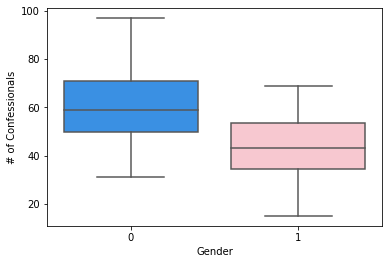

In [226]:
## Make array of confessional counts of women winners
women_array = np.array(conf_winners.loc[women_indices, "# of Confessionals"])

## Make array of confessional counts of men winners
men_indices = np.array([0,1,2,3,4,5,6,7,9,10,11,12,13,18,19,20,21,22,23,25,30,31,35])
men_array = np.array(conf_winners.loc[men_indices, "# of Confessionals"])

all_arrays = [men_array, women_array]

sns.boxplot(data = all_arrays, palette = ['dodgerblue', 'pink']).set(xlabel='Gender', ylabel='# of Confessionals')

We can see that the boxplot for confessionals by winning men (the blue one on the left) is generally much higher than the boxplot for confessionals by winning women. The median for women (43) is lower than men's Q1 (48), the Q3 for the women (53.5) is lower than the men's median (59), and the maximum for women (69) is around the men's Q3 (71). So, beyond just some tuples and numbers from before, we can see graphically that men who win just get more confessionals than women who win. 

Man           AxesSubplot(0.1,0.15;0.363636x0.75)
Woman    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

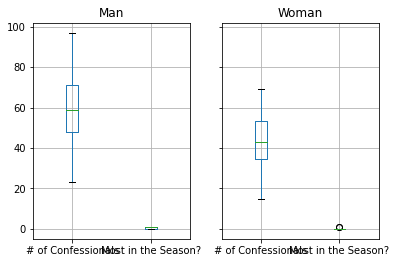

In [227]:
conf_winners.groupby('Gender').boxplot()

That was another way of doing a boxplot that I found, but it gets all jumbled on the bottom, it produces 2 separate graphs, and it does not have colors. I like the colors. 

In [278]:
men_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()["Man"]
women_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()["Woman"]
total_most_conf = conf_winners.groupby('Gender')['Most in the Season?'].sum()
total_most_conf

Gender
Man      13
Woman     2
Name: Most in the Season?, dtype: int64

There are 13 winning men who had the most confessionals in their season, but only 2 winning women who had the most confessionals in their season.

In [343]:
men_percent_most_conf = (men_most_conf / men_winners) * 100
women_percent_most_conf = round((women_most_conf / women_winners) * 100, 2)
men_percent_most_conf, women_percent_most_conf

(52.0, 13.33)

Another way to put it is that 52% of men who win have the most confessionals in their season, while only 13.33% of women who win have the most in their season. Men who win are given a much larger piece of the narrative and get to tell their story more.

### Now let's find trends in the Idols Found dataset

In [453]:
total_idols = idols['# of Idols Found'].sum()
idols_per_season = total_idols / 30 ## The hidden immunity idol was introduced in Season 11, so there have been 30 seasons with it
idols_per_season

4.233333333333333

There are about 4.2 hidden immunity idols found per season. This number helps set up some context for later numbers.

In [466]:
women_idols = idols['M/W Count'].sum()
men_idols = total_idols - women_idols

men_idols, women_idols

(90, 37)

We can see that men find many more idols than women, by a gigantic margin. 

In [469]:
men_idols_percent = men_idols / total_idols
women_idols_percent = women_idols / total_idols

men_idols_percent, women_idols_percent

(0.7086614173228346, 0.29133858267716534)

Men have found just under 71% of all idols while women have only found 29% of all idols. 

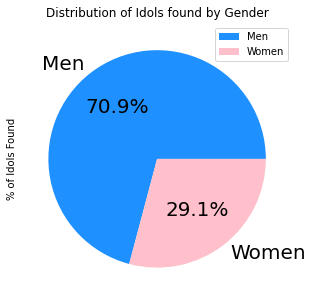

In [491]:
idols_pie_data = [men_idols_percent, women_idols_percent]
idols_pie_df = pd.DataFrame(idols_pie_data, index = ['Men', 'Women'], columns = ['% of Idols Found'])
idols_pie_df.plot.pie(y='% of Idols Found', colors=['dodgerblue', 'pink'], figsize=(5, 5), title="Distribution of Idols found by Gender", autopct='%1.1f%%', fontsize=20)
plt.show()

In [310]:
men_idols / women_idols

2.4324324324324325

For every 1 idol a woman finds, a man finds about 2.43 idols on average. That is a huge disparity and men clearly have an advantage when it comes to finding hidden immunity idols.

But let's do a statistical test to see if these numbers are statistically significant. We can do a binomial test with p=.5, n=127, and # of successes = 90. This represents the 90 idols men have found, out of 127 total, and if that is significantly beyond an even 50/50 probability of a man and woman having the same odds of finding an idol. And the significance value = .05

In [325]:
stats.binom_test(90, n=127, p=0.5)

2.872030486807263e-06

We can see that if the probability was 50% for men to find an idol, then it is almost impossible for men to find this many idols. This is well under the significance value of .05, so we can conclude this is statistically significant. As in, the number of idols men have actually found is well beyond men and women each having an even 50% chance of finding an idol. So we can see that this is not equal and men have a significant advantage in finding hidden immunity idols.  

In [330]:
stats.binom_test(90, n=127, p=0.6)

0.01414576527359386

Even if we were to say men have a slight advantage in finding idols, so the probability is 60% for men, then still the numbers are still statistically significant with a significance value = .05. As in, men have significantly above a 60% chance of finding an idol, which becomes far from being equal.

### Let's also look at trends in the Individual Immunity Challenge Wins dataset

In [348]:
total_ind_imm = ind_imm['# of Immunity Challenges Won'].sum()
ind_imm_per_season = total_ind_imm / 40 ## There have been individual immunity challenges in all 40 seasons of Survivor
ind_imm_per_season

8.65

There are an average of 8.65 individual immunity challenges per season, which helps contextualize some other numbers we will look at. 

In [353]:
women_ind_imm = ind_imm['Women Count'].sum()
men_ind_imm = total_ind_imm - women_ind_imm
men_ind_imm, women_ind_imm

(215, 131)

Men have won a total of 215 individual immunity challenges throughout the history of the show while women have won 131, which is far less. 

In [470]:
men_indimm_avg = men_ind_imm / 40
women_indimm_avg = women_ind_imm / 40
men_indimm_avg, women_indimm_avg 

(5.375, 3.275)

Averaging for all 40 seasons, men win just over 2 more challenges per season than women, which becomes a large disparity when there are 40 seasons! 

In [354]:
men_indimm_percent = men_ind_imm / total_ind_imm
women_indimm_percent = women_ind_imm / total_ind_imm
men_indimm_percent, women_indimm_percent

(0.6213872832369942, 0.3786127167630058)

We can see that men win about 62.14% of individual immunity challenges, while women win about 37.86%. This seems to be well beyond an equal 50/50 odds, but let's do another binomial test for significance.

Similar to the binomial test for the Idols, we will set p=.5, n=346, and # of success = 215 with a significance level of .05. These represent 50% odds of a man winning a challenge, the 346 total individual immunity challenge wins, and the 215 wins by men. So let's find the probability of men winning that many challenges. 

In [356]:
stats.binom_test(215, n=346, p=0.5)

7.364729817165011e-06

This probabiliy is far below our significance level of .05, which means men have won significantly more challenges than women. Which means the odds of winning a challenge for men are well above 50%. So, this is another category of the game where men have a noticeable advantage over women.

When men are finding significantly more idols than women and are winning considerably more challenges than women, these are more opportunities of power in the game of Survivor that are going to men. When a player plays an idol or possesses the immunity necklace (from winning an individual immunity challenge), that player is safe from receiving any votes for elimination. So, men having these advantages in the game directly helps them survive longer and gives them a higher chance to make it to Final Tribal Council, which is where the jury votes on the last 2/3 players remaining on who should win the game.

### Let's look at the breakdown of votes, by gender, at Final Tribal Council 

In [364]:
men_votes = int(votes_FTC['Total Votes for Men'].sum())
women_votes = int(votes_FTC['Total Votes for Women'].sum())
men_votes, women_votes

(212, 127)

In the history of the show, men have received 212 votes to win at a final tribal council, while women have only received 127.

In [369]:
total_votes = men_votes + women_votes
men_FTC = int(votes_FTC['# of Men'].sum()) ## total number of men to appear in Final Tribal Council (FTC)
women_FTC = int(votes_FTC['# of Women'].sum()) ## total number of women to appear in FTC
men_FTC, women_FTC

(54, 51)

Despite there being almost the same amount of men (54) and women (51) to appear in a FTC, men have 85 more FTC votes to win than women do. Let's get the average amount of votes received per player, grouped by gender. 

In [371]:
votes_per_woman = women_votes / women_FTC
votes_per_man = men_votes / men_FTC
votes_per_man, votes_per_woman

(3.925925925925926, 2.4901960784313726)

Each man that appears in a FTC receives almost 4 votes on average, while each woman receives about 2.5 votes. 

In [382]:
votes_FTC.describe()

,Season,# of Men,# of Women,Total Votes for Men,Total Votes for Women
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,1.350000,1.275000,5.300000,3.175000
std,11.690452,0.769615,0.715667,3.962646,3.185605
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,1.000000,1.000000,1.750000,0.000000
50%,20.500000,1.000000,1.000000,5.000000,2.000000
75%,30.250000,2.000000,2.000000,9.000000,7.000000
max,40.000000,3.000000,3.000000,13.000000,9.000000


In [381]:
votes_FTC[['Total Votes for Men', 'Total Votes for Women']].describe()

,Total Votes for Men,Total Votes for Women
count,40.000000,40.000000
mean,5.300000,3.175000
std,3.962646,3.185605
min,0.000000,0.000000
25%,1.750000,0.000000
50%,5.000000,2.000000
75%,9.000000,7.000000
max,13.000000,9.000000


Here is a 5-number summary, plus count, mean, and std of the 2 columns that have the most volatility in data (basically the other columns are not a very compelling 5-number summary). We can see in all but the min, the men get more votes at a FTC. 

<AxesSubplot:>

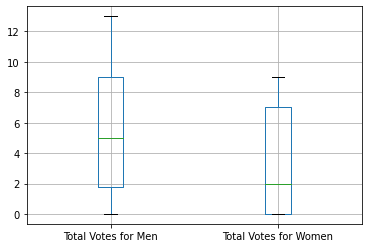

In [422]:
votes_FTC.boxplot(column=['Total Votes for Men', 'Total Votes for Women'])

There is an interesting trend of women getting 3rd place and receiving 0 votes. There are enough 0-vote-finalist women to make the Q1 still at 0. Meanwhile, the Q1 for men is 1.75 because of less 0-vote-finalists that are men. 

([<matplotlib.axis.XTick at 0x1e8f47905e0>,
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0')])

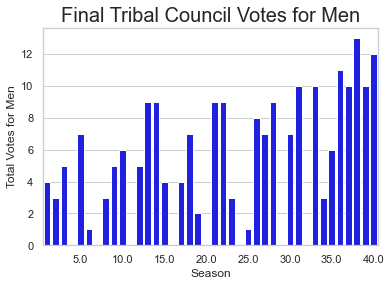

In [530]:
sns.set(style="whitegrid")
sns.barplot(x='Season', y = 'Total Votes for Men', data = votes_FTC, color = "Blue")
plt.title('Final Tribal Council Votes for Men', size = 20)
plt.xticks([i for i in range(4,44,5)])

[Post about setting ticks to integers](https://stackoverflow.com/questions/34192971/how-can-i-remove-digits-after-decimal-in-axis-ticks-in-matplotlib)

([<matplotlib.axis.XTick at 0x1e8f2af0af0>,
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0')])

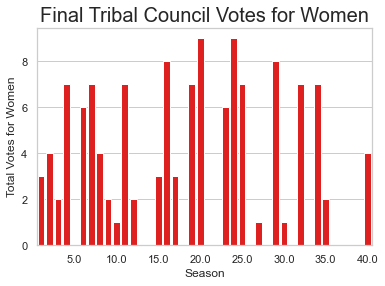

In [519]:
sns.set(style="whitegrid")
sns.barplot(x='Season', y = 'Total Votes for Women', data = votes_FTC, color = "Red")
plt.title('Final Tribal Council Votes for Women', size = 20)
plt.xticks([i for i in range (4,44,5)])

This dataset is mainly compelling because of its comparison of men versus women. So, the seasons where it is all men or all women in a FTC are not that interesting here. Because if there are all women competing in a FTC, then of course women will get all the votes and men will not get any, or vice versa. So, let's remove all rows with 0 men or 0 women at a FTC.

In [531]:
## Gives all the rows with 0 men or 0 women, which helps to make the list of the rows to remove
votes_FTC[(votes_FTC['# of Men'] == 0) | (votes_FTC['# of Women'] == 0)]

,Season,First,Second,Third,# of Men,# of Women,Total Votes for Men,Total Votes for Women
6,4.0,Vecepia,Neleh,NaN,0.0,2.0,0.0,7.0
8,5.0,Brian,Clay,NaN,2.0,0.0,7.0,0.0
12,7.0,Sandra,Lil,NaN,0.0,2.0,0.0,7.0
20,11.0,Dannie,Stephenie,NaN,0.0,2.0,0.0,7.0
30,16.0,Parvati,Amanda,NaN,0.0,2.0,0.0,8.0
34,18.0,JT,Stephen,NaN,2.0,0.0,7.0,0.0
40,21.0,Fabio,Chase,Sash,3.0,0.0,9.0,0.0
46,24.0,Kim,Sabrina,Chelsea,0.0,3.0,0.0,9.0
54,28.0,Tony,Woo,NaN,2.0,0.0,9.0,0.0
56,29.0,Natalie,Jaclyn,Missy,0.0,3.0,0.0,8.0


In [532]:
rows_to_drop = np.array([6,7,8,9,12,13,20,21,30,31,34,35,40,41,46,47,54,55,56,57])
## Note: Because of the quirky indices of the rows, each season has 2 rows, hence why I have to always count 2 indices in the array
votes_FTC = votes_FTC.drop(rows_to_drop)

Now that we are more directly looking at men versus women, let's look at this new data.

In [533]:
votes_FTC[['Total Votes for Men', 'Total Votes for Women']].describe()

,Total Votes for Men,Total Votes for Women
count,30.000000,30.000000
mean,6.000000,2.700000
std,3.695291,2.781094
min,0.000000,0.000000
25%,3.000000,0.000000
50%,5.500000,2.000000
75%,9.000000,4.000000
max,13.000000,9.000000


<AxesSubplot:>

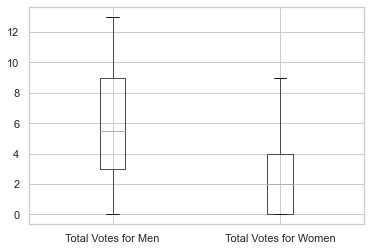

In [534]:
votes_FTC.boxplot(column=['Total Votes for Men', 'Total Votes for Women'])

We can see that when the votes come from strictly men versus women situations, the disparity is even larger. There is almost no overlap between the Interquartile ranges (Q1 for men is 3 and Q3 for women is 4).

([<matplotlib.axis.XTick at 0x1e8f4a82940>,
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '8.0'),
  Text(5, 0, '9.0')])

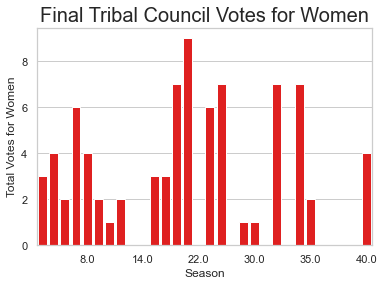

In [536]:
sns.set(style="whitegrid")
sns.barplot(x='Season', y = 'Total Votes for Women', data = votes_FTC, color = "Red")
plt.title('Final Tribal Council Votes for Women', size = 20)
plt.xticks([i for i in range (4,34,5)])